<a href="https://colab.research.google.com/github/EmmanuelJhno/Reinforcement_learning/blob/master/TP1_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [0]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt

Gym provides an environment to compare reinforcement learning algorithms. We provide the code and it provides the game and visualizations.

# Consider the robot model described in Barto and Sutton Example 3.2

In [0]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 1
beta = 1
r_wait = 0.5
r_search = 2.0

# We define a discrete environment with the corresponding transitions
def generar_ambiente(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_wait):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)
env = generar_ambiente()

# Implement the random strategy for 20 steps

Define a random action and see what reward it produces


In [0]:
def random_action(states, actions):
  return np.random.randint(0,len(actions))

In [0]:
def train(env,epoch,prefix=''):

    reward_history = [[] for _ in range(epoch)]

    for e in range(1,epoch+1):
        # At each epoch, we restart to a fresh game and get the initial state
        state = env.reset()
        # This assumes that the games will terminate
        game_over = False

        idx = 0
        while idx <20 and not game_over:
            # The agent performs an action
            action = random_action(states, actions)

            # Apply an action to the environment, get the next state, the reward
            # and if the games end
            state, reward, game_over, info = env.step(action)

            reward_history[e-1].append(reward)

            idx += 1

        print("Epoch {:03d}/{:03d} | Global_reward {:.4f}".format(e, epoch, sum(reward_history[e-1])))

    return reward_history

In [5]:
reward_history = train(env,10)

Epoch 001/010 | Global_reward 7.5000
Epoch 002/010 | Global_reward 7.0000
Epoch 003/010 | Global_reward 6.0000
Epoch 004/010 | Global_reward 8.0000
Epoch 005/010 | Global_reward 4.5000
Epoch 006/010 | Global_reward 5.0000
Epoch 007/010 | Global_reward 4.5000
Epoch 008/010 | Global_reward 7.0000
Epoch 009/010 | Global_reward 6.0000
Epoch 010/010 | Global_reward 8.0000


# Plot the global reward 

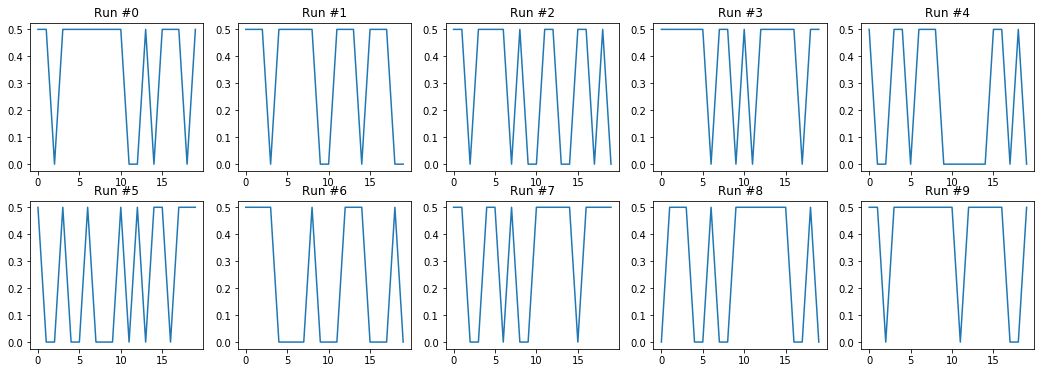

-----------------------------------------------------------------------------------------------------------------------------


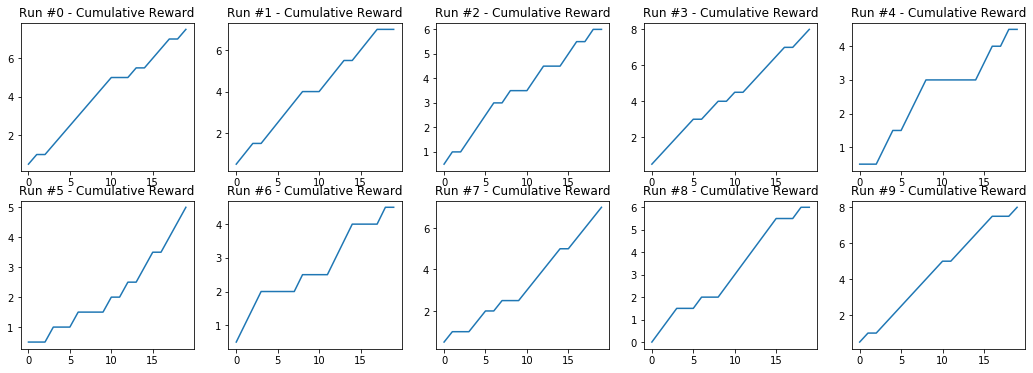

In [6]:
fg, ax = plt.subplots(2, 5, figsize=(18,6)) 
for idx, hist in enumerate(reward_history):
  ax[idx//5][idx%5].plot(range(len(hist)), hist)
  ax[idx//5][idx%5].set_title('Run #{}'.format(idx))
plt.show()

print('-'*125)

fg, ax = plt.subplots(2, 5, figsize=(18,6)) 
for idx, hist in enumerate(reward_history):
  cumulative_hist = [sum(hist[:k+1]) for k in range(len(hist))]
  ax[idx//5][idx%5].plot(range(len(hist)), cumulative_hist)
  ax[idx//5][idx%5].set_title('Run #{} - Cumulative Reward'.format(idx))
plt.show()

# Compute theoretically the optimal value function for each state


It appears that :
- when at state 0, 
  - action 0 -> stay at 0 and reward=0.5
  - action 1 -> stay at 0 and reward=0.5
  - action 2 -> stay at 0 and reward=0
- when at state 1, 
  - action 0 -> stay at 1 and reward=0.5
  - action 1 -> stay at 1 and reward=0.5
  - action 2 -> move to 0 and reward=0

We have the following equation systems:

$
V^{*}(0) =  \max \left\{
  \begin{align*}
    & \text{if} \; a = 0: \quad r_{wait} + \gamma * V^{*}(0) \\
    & \text{if} \; a = 1: \quad r_{search} + \gamma * (\alpha * V^{*}(0) + (1 - \alpha)*V^{*}(1)) \\
    & \text{if} \; a = 2: \quad \gamma * V^{*}(0)
  \end{align*}
  \right.
$


$
V^{*}(1) = \max \left\{
  \begin{align*}
    & \text{if} \; a = 0: \quad r_{wait} + \gamma * V^{*}(1) \\
    & \text{if} \; a = 1: \quad \beta * (r_{search} + \gamma * V^{*}(1)) + (1 - \beta)*(-3 + \gamma * V^{*}(0)) \\
    & \text{if} \; a = 2: \quad \gamma * V^{*}(0)
  \end{align*}
  \right.
$

$\gamma$ being in $[0, 1)$, the $\pi(0)=2$ case must be excluded.

Solving the system yields, for each case:


$
\begin{align*}
    \text{ Case 1: } \quad \pi(0|0) = 1 ; \quad \pi(0|1) = 1 :\\
    & V^{*}(0) = \frac{r_{wait}}{1 - \gamma} \\ 
    & V^{*}(1) = \frac{r_{wait}}{1 - \gamma}
\end{align*}
$

$
\begin{align*}
\text{Case 2:} \quad \pi(1|0) = 1 ; \quad \pi(0|1) = 1 : \\ \\
& V^{*}(0) = \frac{(1-\gamma)*r_{search} + (1-\alpha)*\gamma*r_{wait}}{(1-\gamma)*(1-\alpha*\gamma)}\\
& V^{*}(1) = \frac{r_{wait}}{1 - \gamma}
\end{align*}
$


$
\begin{align*}
\text{Case 3:} \quad \pi(0|0) = 1 ; \quad \pi(1|1) = 1 : \\ \\
& V^{*}(0) = \frac{r_{wait}}{1 - \gamma} \\
& V^{*}(1) = \frac{(1-\gamma)*\beta*r_{search} -3*(1-\beta)*(1-\gamma) + \gamma*(1-\beta)*r_{wait}}{(1-\gamma)*(1-\beta*\gamma)}
\end{align*}
$

$
\begin{align*}
\text{Case 4:} \quad \pi(1|0) = 1 ; \quad \pi(1|1) = 1 : \\ \\
& V^{*}(0) = \frac{r_{search}}{1-\gamma\alpha} +  \frac{\gamma(1-\alpha)}{1-\gamma\alpha}\frac{\left[(1-\gamma\alpha)\beta +\gamma(1-\beta)\right]r_{search}-3(1-\beta)(1-\gamma\alpha)}{(1-\gamma\beta)(1-\gamma\alpha) - \gamma^2(1-\beta)(1-\alpha)}  \\
& V^{*}(1) = \frac{\left[(1-\gamma\alpha)\beta +\gamma(1-\beta)\right]r_{search}-3(1-\beta)(1-\gamma\alpha)}{(1-\gamma\beta)(1-\gamma\alpha) - \gamma^2(1-\beta)(1-\alpha)}
\end{align*}
$

$
\begin{align*}
\text{Case 5:} \quad \pi(0|0) = 1 ; \quad \pi(2|1) = 1 : \\ \\
& V^{*}(0) = \frac{r_{wait}}{1 - \gamma}\\
& V^{*}(1) = \gamma \frac{r_{wait}}{1 - \gamma}
\end{align*}
$

$
\begin{align*}
\text{Case 6:} \quad \pi(1|0) = 1 ; \quad \pi(2|1) = 1 : \\ \\
& V^{*}(0) = \frac{r_{wait}}{1 - \gamma\alpha -(1-\alpha)\gamma^2} \\
& V^{*}(1) = \gamma \frac{r_{wait}}{1 - \gamma\alpha -(1-\alpha)\gamma^2} 
\end{align*}
$

# Implement Value Iteration

  Evaluate the optimal value function given a full description of the environment dynamics
  
   

In [0]:
def evaluate_value_func(env, theta, discount_factor, max_itr=10_000):
    """
    Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        max_itr: Maximum number of iterations in the fixed-point equation resolution

    Returns:
        Vector of length env.nS representing the value function.
    """
    n_states = env.nS
    n_actions = env.nA
    Vn = np.zeros((n_states,))
    Vnp1 = np.inf * np.ones((n_states,))
    itr = 0

    converged = False

    while not converged and itr < max_itr:
        for state in range(n_states):
            best = -np.inf
            for action in range(n_actions):
                transitions = env.P[state][action]
                value = 0
                for prob, next_state, reward, _ in  transitions:
                    value += prob*(reward + discount_factor * Vn[next_state])
                if value > best:
                    best = value
            Vnp1[state] = best
        converged = np.absolute(Vn - Vnp1).max() < theta
        Vn = Vnp1
        itr += 1
    
    return Vnp1

In [19]:
env = generar_ambiente()
value_func = evaluate_value_func(env, theta=0.001, discount_factor=0.9)
print("Found V = ", value_func)

Found V =  [0.95 0.95]


In [20]:
policy = []
for state in range(env.nS):
  possible_rewards = []
  best_reward = 0
  for action in range(env.nA):
    future = env.P[state][action]
    rewards = [future[idx][0]*future[idx][2] for idx in range(len(future))]
    future_rewards = [future[idx][0]*V[future[idx][1]] for idx in range(len(future))]
    action_reward = sum(rewards) + discount_factor*sum(future_rewards)

    if action_reward > best_reward:
      best_reward = action_reward
      best_action = action

  policy.append(best_action)
print('Best associated policy : {}'.format(policy))

Best associated policy : [0, 0]


# Implement policy iteration

Then an policy optimisation function,

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Despues una funcion de optimisacion de la politica:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





In [0]:
def evaluate_policy(policy, env, theta, discount_factor, max_itr=10_000):
    """
    Args:
      policy: [S, A] shaped matrix representing the policy.
      env: OpenAI env. env.P represents the transition probabilities of the environment.
          env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
          env.nS is a number of states in the environment. 
          env.nA is a number of actions in the environment.
      theta: We stop evaluation once our value function change is less than theta for all states.
      discount_factor: Gamma discount factor.
      max_itr: Maximum number of iterations

    Returns:
      Vector of length env.nS representing the value function.
    """
    n_states = env.nS
    n_actions = env.nA
    Vn = np.zeros((n_states,))
    Vnp1 = np.inf * np.ones((n_states,))
    itr = 0

    converged = False

    while not converged and itr < max_itr:
        for state in range(n_states):
            policy_value = 0
            for action in range(n_actions):
                transitions = env.P[state][action]
                for prob, next_state, reward, _ in  transitions:
                    policy_value += policy[state][action] * prob * (reward + discount_factor * Vn[next_state])
            Vnp1[state] = policy_value
        converged = np.absolute(Vn - Vnp1).max() < theta
        Vn = Vnp1
        itr += 1

    return Vnp1

In [0]:
from scipy.special import softmax

def policy_improvement(env, start_policy, policy_eval_fn=evaluate_policy, theta=.01, discount_factor=0.99,
                       hard_thresholding=False, max_itr=1000):
    """
     Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        start_policy: matrix of shape [S, A] representing a valid policy
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        hard_thresholding: boolean, set to True to enforce deterministic policies.
        max_itr: Maximum number of iterations
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
    """
    n_states = env.nS
    n_actions = env.nA
    env.reset()
    
    pn = start_policy
    Vn = policy_eval_fn(pn, env, theta, discount_factor)
    
    itr = 0
    converged = False
    
    while not converged and itr < max_itr:
        rewards = []
        for state in range(n_states):
            rewards.append([])
            for action in range(n_actions):
                rewards[state].append(0)
                transitions = env.P[state][action]
                for prob, next_state, reward, _ in  transitions:
                    rewards[state][action] += prob* (reward + discount_factor * Vn[next_state])
        
        if not hard_thresholding:
            pnp1 = softmax(np.array(rewards), axis=1)
        else:
            pnp1 = np.zeros(pn.shape)
            best_action = np.argmax(np.array(rewards), axis=1)
            for state in range(n_states):
                pnp1[state, best_action[state]] = 1.0
            
        
        Vnp1 = policy_eval_fn(pnp1, env, theta, discount_factor)
        converged = np.absolute(Vn - Vnp1).max() < theta
        Vn = Vnp1
        pn = pnp1
        itr += 1
    
    return (pn, Vn)

In [23]:
max_iter = 100
theta = 1e-4
discount_factor = 0.99

policy = np.array([[1.,  0., 0.],
                   [1.,  0., 0.]])
env = generar_ambiente()

value_func = evaluate_policy(policy, env, theta=theta, discount_factor=discount_factor, max_itr=max_iter)
print("Start policy:")
print("{}".format(policy))
print("Value function = ", value_func)

print()

new_policy, new_value_func = policy_improvement(env, policy, theta=theta, discount_factor=discount_factor, max_itr=max_iter)
print("Improved policy (softmax):")
print("{}".format(new_policy))
print("Value function = ", new_value_func)

new_policy, new_value_func = policy_improvement(env, policy, theta=theta, discount_factor=discount_factor, max_itr=max_iter,
                                               hard_thresholding = True)
print("Improved policy (hard thresholding):")
print("{}".format(new_policy))
print("Value function = ", new_value_func)

Start policy:
[[1. 0. 0.]
 [1. 0. 0.]]
Value function =  [0.995 0.995]

Improved policy (softmax):
[[0.38365173 0.38365173 0.23269654]
 [0.39191142 0.39191142 0.21617717]]
Value function =  [0.76346695 0.85942232]
Improved policy (hard thresholding):
[[1. 0. 0.]
 [1. 0. 0.]]
Value function =  [0.995 0.995]


# Using the 3 algorithms do the following experiments


In [0]:
exp1 = generar_ambiente(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = generar_ambiente(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = generar_ambiente(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)


# Compare the different strategies with the random one


In [25]:
max_iter = 100
theta = 1e-6
discount_factor = 0.99

random_policy = np.array([[1/3, 1/3, 1/3],
                          [1/3, 1/3, 1/3]])

for i, exp in enumerate([exp1, exp2, exp3, exp4, exp5]):
    print("-"*20)
    print("[Experience # {}]".format(i+1))
    
    exp.reset()
    
    optimal_value_func = evaluate_value_func(exp, theta=theta, discount_factor=discount_factor, max_itr=max_iter)
    random_value_func = evaluate_policy(random_policy, exp, theta=theta, discount_factor=discount_factor, max_itr=max_iter)
    
    print("- Optimal value func:")
    for n_s, name in enumerate(states):
        print("    start = {}: \t{}".format(name.upper(), optimal_value_func[n_s]))
    print()
    
    print("- Value func for random policy:")
    for n_s, name in enumerate(states):
        print("    start = {}: \t{}".format(name.upper(), random_value_func[n_s]))
    print()
    
    improved_policy, improved_value_func = policy_improvement(exp, random_policy, 
                                                              theta=theta, discount_factor=discount_factor, 
                                                              max_itr=max_iter)
    print("- Improved policy (softmax):")
    print(improved_policy)
    print()
    
    print("- Value func for this policy:")
    for n_s, name in enumerate(states):
        print("    start = {}: \t{}".format(name.upper(), improved_value_func[n_s]))
    print()
    
    improved_policy, improved_value_func = policy_improvement(exp, random_policy, 
                                                              theta=theta, discount_factor=discount_factor, 
                                                              max_itr=max_iter,
                                                             hard_thresholding=True)
    print("- Improved policy (hard thresholding):")
    print(improved_policy)
    print()
    
    print("- Value func for this policy:")
    for n_s, name in enumerate(states):
        print("    start = {}: \t{}".format(name.upper(), improved_value_func[n_s]))
    print()

--------------------
[Experience # 1]
- Optimal value func:
    start = HIGH: 	1.9405
    start = LOW: 	1.9210949999999998

- Value func for random policy:
    start = HIGH: 	0.9774
    start = LOW: 	0.40062546666666665

- Improved policy (softmax):
[[0.31492907 0.4940568  0.19101413]
 [0.41613765 0.16898396 0.41487839]]

- Value func for this policy:
    start = HIGH: 	1.269878303121338
    start = LOW: 	0.7678893223865249

- Improved policy (hard thresholding):
[[0. 1. 0.]
 [1. 0. 0.]]

- Value func for this policy:
    start = HIGH: 	1.9405
    start = LOW: 	0.995

--------------------
[Experience # 2]
- Optimal value func:
    start = HIGH: 	1.9405
    start = LOW: 	1.9210949999999998

- Value func for random policy:
    start = HIGH: 	0.9774
    start = LOW: 	0.40062546666666665

- Improved policy (softmax):
[[0.31492907 0.4940568  0.19101413]
 [0.41613765 0.16898396 0.41487839]]

- Value func for this policy:
    start = HIGH: 	1.269878303121338
    start = LOW: 	0.76788932238652